<a href="https://colab.research.google.com/github/davidholcer/All-The-News-Sentiment-Analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on Newspaper Articles

Sentiment Analysis...

## 1. Importing Libraries and Data

In [0]:
import numpy as np 
import pandas as pd 
import re
import nltk
import matplotlib.pyplot as plt
import os
import glob
import json
%matplotlib inline
# activate R magic
%load_ext rpy2.ipython

#for lemization
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
!pip install -U tensorflow_datasets
!pip install -q kaggle

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.3.0)


In [0]:
!mkdir -p !/.kaggle
!cp kaggle.json ~/.kaggle/ 
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d snapcrack/all-the-news -p/content

all-the-news.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip \*.zip

Archive:  all-the-news.zip
replace articles1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [0]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [0]:
combined_csv.iloc[0,9]

'Patriots Day, Peter Berg’s new thriller that recreates the 2013 Boston Marathon bombing and the ensuing manhunt that followed it, is a surprisingly oblique, morally ambiguous movie from a typically straightforward filmmaker. Patriots Day takes an unexpectedly cynical view of the chaos, rash   and bureaucratic infighting that followed the bombing —  the question is whether that was Berg’s intended message. For its grim   running time, the movie celebrates the men on the ground who helped bring the bombers to justice, but it’s the glimpses of something more complicated than jingoism that really linger. The scene that best illustrates this dichotomy comes late in Patriots Day. As the search for one of the bombers, Dzhokhar Tsarnaev, intensifies, his brother’s wife Katherine (Melissa Benoist) is brought in for interrogation on her connections to the case. As she asks for a lawyer, protesting that she “has rights,” her steely interviewer (Khandi Alexander) tuts, “Honey, you ain’t got shit.

In [0]:

clean=combined_csv.copy()
clean['author'].replace(['',' '], np.nan,inplace=True)
clean['content'].replace(['', ' '], np.nan,inplace=True)
clean.dropna(subset=['author','content'],inplace=True)

clean['date'] = clean['date'].astype('datetime64[ns]')
#clean=clean.sort_values(by='author')

In [0]:
import re
def fix_author(x):
  p = re.compile('<.+?>')
  x=p.sub('', x)
  p = re.compile('\(.+?\)')
  x=p.sub('', x)
  p = re.compile('\[.+?\]')
  x=p.sub('', x)
  p = re.compile(r'[^A-zÀ-ú, ]+')
  x=p.sub('', x)
  while (x[0]==' ' or x[0].isalpha()==False):
    x=x[1:]
  if x.istitle()==False:
    x=x.title()
  return x

In [0]:
def clean_content(x):
  x=x.lower()
  p = re.compile(r'[^A-zÀ-ú ]+')
  x=p.sub('', x)
  return x

In [0]:
# def fix_content(content):
#   content=content.lower()
#   words=nltk.word_tokenize(content)
#   lemmatizer=nltk.stem.WordNetLemmatizer()

#   stringg=''

#   for each in range(len(words)):
#     if words[each].isalpha():
#       stringg+=lemmatizer.lemmatize(words[each])+' '
#   return stringg

In [0]:
def fix_content(text):

    lemmatiser = WordNetLemmatizer()
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in text if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [0]:
clean['author']= [fix_author(x) for x in clean['author'].tolist()]

In [0]:
# clean.assign(freq=clean.groupby('author')['author'].transform('count'))\
#   .sort_values(by=['freq','author'],ascending=[False,True]).loc[:,['author']]

In [0]:
clean.reset_index(inplace=True)

In [0]:
smaller=clean.sample(n=500, random_state=1)

In [0]:
smaller.reset_index(inplace=True)

In [0]:
smaller['content']= [clean_content(x) for x in smaller['content'].tolist()]

In [0]:
smaller

,level_0,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,168519,96069,56808,78073,Quoted,Atlantic,Rosa Inocencio Smith,2016-08-01,2016.0,8.0,NaN,the modal view is leave the freaking system al...
1,224957,161060,121953,181064,Brazil waters down pension reform as protests ...,Reuters,Maria Carolina Marcello And Ueslei Marcelino,2017-04-19,2017.0,4.0,http://www.reuters.com/article/us-brazil-polit...,brazilian president michel temer on tuesday m...
2,220989,157059,117952,173749,"Turn On, Tune In, Transcribe: U.N. Develops Ra...",NPR,Camila Domonoske,2016-10-31,2016.0,10.0,http://www.npr.org/sections/alltechconsidered/...,voice recognition surrounds americans from s...
3,36243,44007,97466,143967,Hackers reveal Hollywood elite’s role in Democ...,New York Post,Fox News,2016-07-19,2016.0,7.0,http://nypost.com/2016/07/19/hackers-reveal-ho...,another batch of documents has purportedly bee...
4,313040,255524,20387,39133,ISIS-Linked Group Claims Responsibility for Ro...,Breitbart,Breitbart Jerusalem,2016-01-02,2016.0,1.0,NaN,a salafi terrorist group associated with islam...
...,...,...,...,...,...,...,...,...,...,...,...,...
495,173567,104391,65142,88702,GOP Senator: Trump’s ’Extreme Vetting’ Order W...,Talking Points Memo,Esme Cribb,NaT,NaN,NaN,https://web.archive.org/web/20170130011840/htt...,sen rob portman said in an interview sunday ...
496,147994,74527,127990,191563,"Fed ’very close’ to employment, inflation goal...",Reuters,Jonathan Spicer And Richard Leong,2016-10-17,2016.0,10.0,http://www.reuters.com/article/us-usa-fed-fisc...,the federal reserve is very close to its u s ...
497,178874,113200,74038,111716,"Before Running The Trump Campaign, Steve Bann...",Buzzfeed News,Matthew Zeitlin,2016-10-10,2016.0,10.0,https://web.archive.org/web/20161010091213/htt...,when charles fust found out that breitbart pu...
498,203847,138271,99160,146307,British banks handled vast sums of laundered R...,Guardian,Luke Harding,2017-03-20,2017.0,3.0,https://www.theguardian.com/world/2017/mar/20/...,britains high street banks processed nearly m ...


In [0]:
#smaller['content']= [fix_content(x) for x in smaller['content'].tolist()]

In [0]:
# smaller['content']

Publishing detection

In [0]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder
raw_y = smaller['publication']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(raw_y)

In [0]:
# list(labelencoder.inverse_transform(y))

In [0]:
# smaller.sort_values('publication')

the modal view is leave the freaking system alone    dan kahan who studies public perceptions of science on how americans see vaccines i thought i understood national politics pretty well but this year is so baffling that i feel like im in another culture   newton minow who helped create the system of televised presidential debates its a very very squishy area    andrew cowan an appraiser and auctioneer on selling infamous murder weapons i for one am breathlessly waiting for the film adaption harry potter and the mountain of cash hopefully they can stretch that into at least a     an atlantic reader on the latest addition to the harry potter series previous quotes from our sources here         for us to continue writing great stories we need to display ads             please select the extension that is blocking ads     please follow the steps below
Atlantic


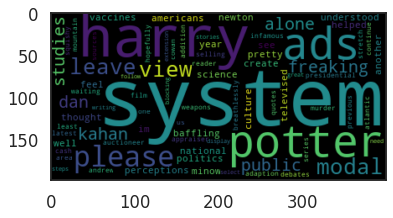

 brazilian president michel temer on tuesday made new concessions to ease passage of an unpopular pension reform bill leading police unions to try and invade congress in the latest angry demonstration from a labor group the   proposal which has faced pressure from skittish lawmakers has raised doubts among investors about how close it will come to the original goal of narrowing a huge and growing budget deficit after the details of the new proposal were revealed on tuesday protesting police unions clashed with congressional guards in riot gear who used tear gas and stun grenades to disperse the demonstrators from the front doors of congress    the protest underscored the unpopularity of a reform that is at the heart of temers austerity program which aims to rescue the brazilian economy from its deepest recession on record  temer agreed to set a lower retirement age for women police teachers and rural workers and grant more generous transition rules for workers after allies concerns del

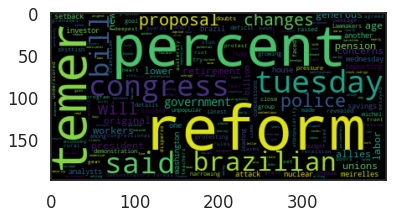

another batch of documents has purportedly been leaked from the democratic national committees servers by the hacker who goes by the name guccifer    the files describe some democrats as wobbly on the controversial iran nuclear deal and provide details of major celebrity donors such as director steven spielberg and actor tom hanks the hacker provided the hill with a cache of documents covering political strategies next weeks democratic national convention in philadelphia and fundraising efforts   guccifer   appears keen to keep their activities in the spotlight last month the shadowy figure or group   for the recent attack on dnc servers and   a purported dossier of hillary   documents the hill reports that the latest batch of document contains a file titled march       plans for recess which appears to be notes from a call with political consultancy democracy partners the file covers political strategies for the april  congressional recesses the note addresses five topics immigration 

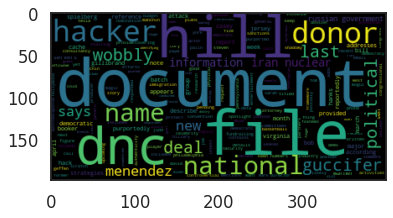

In [0]:
# Importing necessary libraries
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
X = smaller['content']
#print(X[0])
wordcloud1 = WordCloud().generate(str(X[0])) # for EAP
wordcloud2 = WordCloud().generate(str(X[1])) # for HPL
wordcloud3 = WordCloud().generate(str(X[3])) # for MWS 
print(X[0])
print(smaller['publication'][0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()
print(X[1])
print(smaller['publication'][1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()
print(X[3])
print(smaller['publication'][3])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()

In [0]:
# Importing necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# 80-20 splitting the dataset (80%->Training and 20%->Validation)
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2, random_state=1234)
# defining the bag-of-words transformer on the text-processed corpus # i.e., text_process() declared in II is executed...
bow_transformer=CountVectorizer(analyzer=fix_content).fit(X_train)
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_train=bow_transformer.transform(X_train)#ONLY TRAINING DATA
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_test=bow_transformer.transform(X_test)#TEST DATA

In [0]:
# Importing necessary libraries
from sklearn.naive_bayes import MultinomialNB
# instantiating the model with Multinomial Naive Bayes..
model = MultinomialNB()
# training the model...
model = model.fit(text_bow_train, y_train)

In [0]:
model.score(text_bow_train, y_train)


0.9525

In [0]:
model.score(text_bow_test, y_test)


0.39

In [0]:
# Importing necessary libraries
from sklearn.metrics import classification_report
 
# getting the predictions of the Validation Set...
predictions = model.predict(text_bow_test)
# getting the Precision, Recall, F1-Score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.29      0.22      0.25         9
           1       0.38      0.95      0.54        21
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.33      0.20      0.25         5
           6       0.00      0.00      0.00         5
           7       0.20      0.17      0.18        12
           8       0.00      0.00      0.00         2
           9       0.67      0.40      0.50        15
          10       1.00      0.33      0.50         3
          11       0.57      0.57      0.57         7
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          14       0.33      0.30      0.32        10

    accuracy                           0.39       100
   macro avg       0.27      0.22      0.22       100
weighted avg       0.35      0.39      0.33       100



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
inputt=input("")

KANSAS CITY, Mo. — The Kansas City School District falsified attendance data for three years in a bid to regain full accreditation from the state, according to the results of an investigation released Wednesday.Because Missouri funds schools in part based on student attendance, the manipulation led to the district being overpaid and it will have to repay money to the state. The amount the district will have to return hasn’t been determined.Seven officials were involved in falsifying the data from 2013 to 2016, the district said. Three of the employees involved in the manipulation are no longer with the district and the other four have been placed on paid administrative leave, The Kansas City Star reported.The tampering occurred during the tenures of former Superintendent Steve Green former Interim Superintendent Al Tunis. Mark Bedell took over in July 2016 and said the district has taken several steps to ensure the manipulation never happens again.“I can assure you that there hasn’t be

In [0]:
input_try=[[inputt]]

In [0]:
df = pd.DataFrame(data=input_try,columns=['content'])

In [0]:
df['content']= [clean_content(x) for x in df['content'].tolist()]

In [0]:
df['content']= [fix_content(x) for x in df['content'].tolist()]

In [0]:
input_trial=bow_transformer.transform(df['content'])

In [0]:
input_result=model.predict(input_trial)

In [0]:
input_res=list(labelencoder.inverse_transform(input_result))

In [0]:
print("Your input text most likely comes from %s"%input_res[0])

Your input text most likely comes from Breitbart


Plot

In [0]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


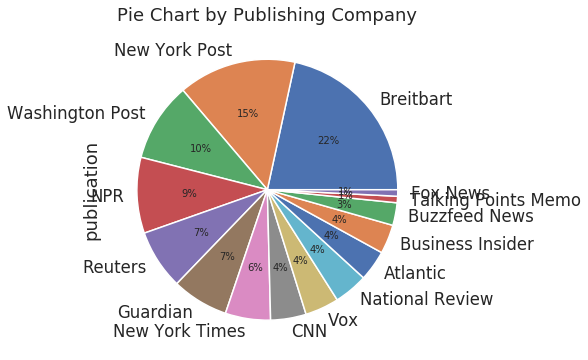

In [0]:
smaller.publication.value_counts().plot(kind='pie', autopct='%1.0f%%',title='Pie Chart by Publishing Company')

Emotional Analysis

In [0]:
pip install --upgrade "ibm-watson>=4.0.1"

Requirement already up-to-date: ibm-watson>=4.0.1 in /usr/local/lib/python3.6/dist-packages (4.0.1)


In [0]:
#import ibm_watson
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import *
from io import StringIO 

In [0]:
def perform_emotion_analysis(input_text):
  authenticator = IAMAuthenticator('-gYe7vGCYYrsDYeb0U7C50hikjsy4wrJzsNwD22a472g')
  natural_language_understanding = NaturalLanguageUnderstandingV1(
      version='2019-10-21',
      authenticator=authenticator
  )

  natural_language_understanding.set_service_url('https://gateway.watsonplatform.net/natural-language-understanding/api')
  
  #print (features)
  response = natural_language_understanding.analyze(text=input_text,features=Features(
      emotion=EmotionOptions(document=True)
      )).get_result()
        #gets top n (limit) entities
        #entities=EntitiesOptions(emotion=True, sentiment=True, limit=2),
        #gets top n (limit) # of keywords
        #keywords=KeywordsOptions(emotion=True, sentiment=True,
         #                        limit=2)
        
        
                                 
                                 #features=Features(emotion=EmotionOptions(targets=['Republicans','Obama']))).get_result()

  prod_emotion_data=(json.dumps(response, indent=2))
  #return prod_emotion_data
  return json.JSONDecoder().decode(prod_emotion_data)['emotion']['document']['emotion']

In [0]:
def perform_category_analysis(input_text):
  authenticator = IAMAuthenticator('-gYe7vGCYYrsDYeb0U7C50hikjsy4wrJzsNwD22a472g')
  natural_language_understanding = NaturalLanguageUnderstandingV1(
      version='2019-10-21',
      authenticator=authenticator
  )

  natural_language_understanding.set_service_url('https://gateway.watsonplatform.net/natural-language-understanding/api')
  
  #print (features)
  response = natural_language_understanding.analyze(text=input_text,features=Features(
        categories=CategoriesOptions(limit=1))).get_result()
                                 
                                 #features=Features(emotion=EmotionOptions(targets=['Republicans','Obama']))).get_result()

  cat=(json.dumps(response, indent=2))
  return json.JSONDecoder().decode(cat)['categories'][0]['label'][1:].split('/')

In [0]:
import time
start = time.time()

counter=0
while counter<30:#clean.size:
  emotions=perform_emotion_analysis(combined_csv.iloc[counter,9])
  values=list(emotions.values())
  smaller.loc[counter,'max_emotion']=list(emotions.keys())[values.index(max(values))]

  if counter<5:
    cat=perform_category_analysis(combined_csv.iloc[counter,9])
    for c,value in enumerate(cat):
      smaller.loc[counter,11+c]=value

  counter+=1;


end = time.time()
print(end - start)

47.27651238441467


In [0]:
emotion_0=perform_emotion_analysis(combined_csv.iloc[0,9])

In [0]:
# cat=perform_category_analysis(combined_csv.iloc[0,9])

In [0]:
# trial = trial.reset_index(drop=True)

In [0]:
# values=list(emotion_0.values())
# list(emotion_0.keys())[values.index(max(values))]

In [0]:
# trial.sort_values('publication',inplace=True)

In [0]:
wsmaller.head()

,level_0,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content,max_emotion,11,12,13
0,13413,21169,74577,113561,Donald Trump And The End Of “Time”,Buzzfeed News,Anne Helen Petersen,2016-12-08,2016.0,12.0,https://web.archive.org/web/20161208153906/htt...,when time magazine first launched its man of ...,anger,art and entertainment,movies and tv,movies
1,102520,27276,80734,121795,Football and Fallacies,National Review,Thomas Sowell,2016-11-24,2016.0,11.0,http://www.nationalreview.com/article/442456/f...,this is a football story with both political a...,joy,health and fitness,disease,NaN
2,216311,6653,6653,24983,Gay Catholic Groups Want Pope Francis to Do Mo...,New York Times,Jim Yardley,2016-06-28,2016.0,6.0,NaN,rome leaders of gay catholic groups on mon...,sadness,society,racism,NaN
3,80354,39920,143382,214684,A C-SPAN caller asked a black guest how to sto...,Washington Post,Colby Itkowitz,2016-08-24,2016.0,8.0,https://web.archive.org/web/20160825002240/htt...,a white man from north carolina call...,disgust,"law, govt and politics",NaN,NaN
4,211002,1319,1319,18770,Damien Hirst Alienated Collectors. Will His Ne...,New York Times,Robin Pogrebin,2017-02-25,2017.0,2.0,NaN,imagine the rolling stones coming out with a n...,sadness,technology and computing,computer crime,NaN


In [0]:
from matplotlib import pyplot as plt

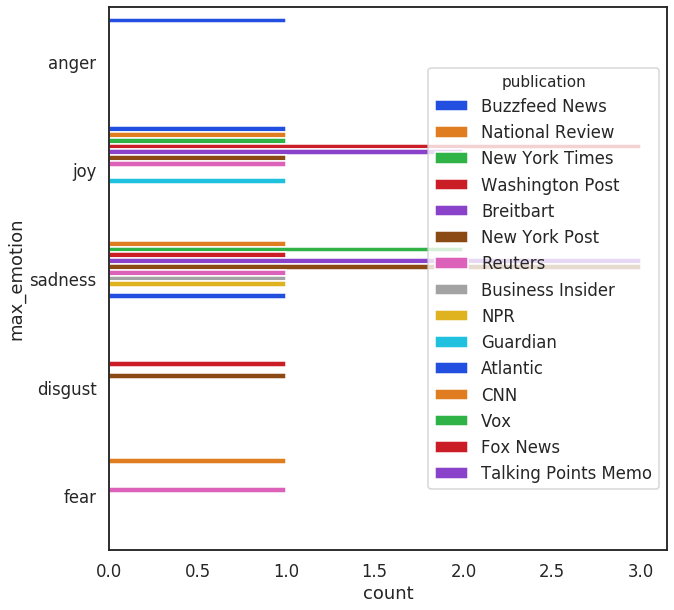

In [0]:
plt.figure(figsize=(10,10))
plots=sns.countplot(y='max_emotion', hue='publication', data=smaller, palette="bright")

In [0]:
import seaborn as sns

sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1) = plt.subplots(1, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list(emotion_0.keys()))
y1 = np.array(list(emotion_0.values()))
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k",clip_on=False)
ax1.set_ylabel("Probability")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=(np.arange(0, max(y1), step=0.1)))
plt.tight_layout(h_pad=2)

In [0]:
# def visualize_emotion_data(decoded):
#     """
#     method that takes in emotion data and generates a pei chart that represnts the count of each emotion.
#     IBM provides data for 5 types of emotions: Joy, Anger, Disgust, Sadness, and fear
#     :param prod_emotion_data:
#     :return:
#     """
#     #string parsing
#     #em=prod_emotion_data.replace("\n", "")
#     #decoded=json.JSONDecoder().decode(prod_emotion_data)['emotion']['document']['emotion']

#     # define chart properties
#     labels = tuple(decoded.keys())
#     sizes = list(decoded.values())
#     # initialize the chart
#     plt.bar(labels,sizes)#, autopct='%1.1f%%')
#     plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     plt.show()